

# Mini Project 2: Movie Box Office Prediction Project

## Introduction
This project aims to provide students with a comprehensive understanding of **data analysis**, **feature engineering**, and building **prediction model** using Python. The following script integrates the various functionalities discussed in the provided code files.

## Code Overview
The code below is a Jupyter Notebook that combines functionalities from data exploration to building prediction models. You can work on each section independently, and then integrate them as a cohesive movie analysis and box office prediction model

## Grading
- Basic tasks (85%) - Submit the task notebook file to Moodle
- Bouns task (20%) - Submit the prediction results to Kaggle

## Instructions for Students

1. **Setup Environment:** Ensure you have all necessary libraries installed, including `pandas`, `sklearn`, `numpy`, and other dependencies required for running the above script. Install the libraries using:
   ```bash
   conda create -n cisc7201_mini02
   conda activate cisc7201_mini02
   conda install conda-forge::python=3.10 conda-forge::pandas conda-forge::numpy conda-forge::scikit-learn conda-forge::matplotlib  
   ```
 


## Task 1 Exploring the Dataset (40%)

- Extract the file to access all datasets located within the "data" folder, within the folder, there is one dataset in "tmdb_5000_movies.csv" file. Extract data from the CSV file to obtain information on movies.
- Your task is to 
 > 1) show some example data in the CSV file to see its data format.
 > 2) carefully examine the characteristics of each dimension of the data. For numerical dimensions, consider the scale of the values and whether there are any outliers. For categorical dimensions, think about how to utilize these categorical features.
 > 3) made a visual analysis of some features of the movie data to help the box office prediction and movie recommendation in the future.


## Task 1.1 Loading data (10%)

- Show some example data in the CSV file to see its data format.
- Your task is to print the tail (5 items) of the data data_movies

In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', 50) 
pd.set_option('display.max_rows', 50)  
pd.set_option( "display.max_colwidth" , None )
np.set_printoptions(threshold=np.inf)
data_movies = pd.read_csv('data/tmdb_5000_movies_train.csv')

# Print the tail (5 items) of the data, write the codes here
data_movies.tail(5)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
4601,220000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""name"": ""Crime""}, {""id"": 53, ""name"": ""Thriller""}]",NaN,9367,"[{""id"": 5616, ""name"": ""united states\u2013mexico barrier""}, {""id"": 33649, ""name"": ""legs""}, {""id"": 162740, ""name"": ""arms""}, {""id"": 187891, ""name"": ""paper knife""}, {""id"": 206558, ""name"": ""guitar case""}]",es,El Mariachi,"El Mariachi just wants to play his guitar and carry on the family tradition. Unfortunately, the town he tries to find work in has another visitor...a killer who carries his guns in a guitar case. The drug lord and his henchmen mistake El Mariachi for the killer, Azul, and chase him around town trying to kill him and get his guitar case.",14.269792,"[{""name"": ""Columbia Pictures"", ""id"": 5}]","[{""iso_3166_1"": ""MX"", ""name"": ""Mexico""}, {""iso_3166_1"": ""US"", ""name"": ""United States of America""}]",1992-09-04,2040920,81.0,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",Released,"He didn't come looking for trouble, but trouble came looking for him.",El Mariachi,6.6,238
4602,9000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""name"": ""Romance""}]",NaN,72766,[],en,Newlyweds,A newlywed couple's honeymoon is upended by the arrivals of their respective sisters.,0.642552,[],[],2011-12-26,0,85.0,[],Released,A newlywed couple's honeymoon is upended by the arrivals of their respective sisters.,Newlyweds,5.9,5
4603,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""name"": ""Drama""}, {""id"": 10749, ""name"": ""Romance""}, {""id"": 10770, ""name"": ""TV Movie""}]",http://www.hallmarkchannel.com/signedsealeddelivered,231617,"[{""id"": 248, ""name"": ""date""}, {""id"": 699, ""name"": ""love at first sight""}, {""id"": 2398, ""name"": ""narration""}, {""id"": 5340, ""name"": ""investigation""}, {""id"": 34051, ""name"": ""team""}, {""id"": 173066, ""name"": ""postal worker""}]",en,"Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedicated quartet of civil servants in the Dead Letter Office of the U.S. Postal System who transform themselves into an elite team of lost-mail detectives. Their determination to deliver the seemingly undeliverable takes them out of the post office into an unpredictable world where letters and packages from the past save lives, solve crimes, reunite old loves, and change futures by arriving late, but always miraculously on time.",1.444476,"[{""name"": ""Front Street Pictures"", ""id"": 3958}, {""name"": ""Muse Entertainment Enterprises"", ""id"": 6438}]","[{""iso_3166_1"": ""US"", ""name"": ""United States of America""}]",2013-10-13,0,120.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,NaN,"Signed, Sealed, Delivered",7.0,6
4604,0,[],http://shanghaicalling.com/,126186,[],en,Shanghai Calling,"When ambitious New York attorney Sam is sent to Shanghai on assignment, he immediately stumbles into a legal mess that could end his career. With the help of a beautiful relocation specialist, a well-connected old-timer, a clever journalist, and a street-smart legal assistant, Sam might just save his job, find romance, and learn to appreciate the beauty and wonders of Shanghai. Written by Anonymous (IMDB.com).",0.857008,[],"[{""iso_3166_1"": ""US"", ""name"": ""United States of America""}, {""iso_3166_1"": ""CN"", ""name"": ""China""}]",2012-05-03,0,98.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,A New Yorker in Shanghai,Shanghai Calling,5.7,7
4605,0,"[{""id"": 99, ""name"": ""Documentary""}]",NaN,25975,"[{""id"": 1523, ""name"": ""obsession""}, {""id"": 2249, ""name"": ""camcorder""}, {""id"": 9986, ""name"": ""crush""}, {""id"": 11223, ""name"": ""dream girl""}]",en,My Date with Drew,"Ever since the second grade when he first saw her in E.T. The 

In [2]:
data_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4606 entries, 0 to 4605
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4606 non-null   int64  
 1   genres                4606 non-null   object 
 2   homepage              1562 non-null   object 
 3   id                    4606 non-null   int64  
 4   keywords              4606 non-null   object 
 5   original_language     4606 non-null   object 
 6   original_title        4606 non-null   object 
 7   overview              4603 non-null   object 
 8   popularity            4606 non-null   float64
 9   production_companies  4606 non-null   object 
 10  production_countries  4606 non-null   object 
 11  release_date          4605 non-null   object 
 12  revenue               4606 non-null   int64  
 13  runtime               4604 non-null   float64
 14  spoken_languages      4606 non-null   object 
 15  status               

## Task 1.2 Data Preprocessing (10%)


- For reference of data processing, note that the release_date column is stored as a string in the format of year, month, and day (e.g., YYYY-MM-DD).  you can use the following code to convert it into a numeric timestamp (Unix timestamp).
- Your task here is to identifying missing values and fill missing values using the mean, median, or other suitable methods
- Hint: you could refer to [fillna()](https://www.w3schools.com/python/pandas/ref_df_fillna.asp)

In [3]:
# Convert the date into a numerical timestamp format
def process_release_date(data_movies):
    data_movies['release_date'] = pd.to_datetime(data_movies['release_date'], format='%Y-%m-%d', errors='coerce')
    data_movies['release_data'] = data_movies['release_date'].astype('int64') // 10**9
    
process_release_date(data_movies)
# Filling missing values for revenue
# Your code starts here
revenue_median=(data_movies['revenue'].median()).astype('int64')
data_movies['revenue'].fillna(revenue_median,inplace=True)

release_data_median=(data_movies['release_data'].median()).astype('int64')
data_movies['release_data'].fillna(release_data_median,inplace=True)

runtime_median=(data_movies['runtime'].median()).astype('int64')
data_movies['runtime'].fillna(runtime_median,inplace=True)

# Print the tail
data_movies.tail()

C:\Users\Sirius\AppData\Local\Temp\ipykernel_27216\3042650406.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_movies['revenue'].fillna(revenue_median,inplace=True)
C:\Users\Sirius\AppData\Local\Temp\ipykernel_27216\3042650406.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a 

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,release_data
4601,220000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""name"": ""Crime""}, {""id"": 53, ""name"": ""Thriller""}]",NaN,9367,"[{""id"": 5616, ""name"": ""united states\u2013mexico barrier""}, {""id"": 33649, ""name"": ""legs""}, {""id"": 162740, ""name"": ""arms""}, {""id"": 187891, ""name"": ""paper knife""}, {""id"": 206558, ""name"": ""guitar case""}]",es,El Mariachi,"El Mariachi just wants to play his guitar and carry on the family tradition. Unfortunately, the town he tries to find work in has another visitor...a killer who carries his guns in a guitar case. The drug lord and his henchmen mistake El Mariachi for the killer, Azul, and chase him around town trying to kill him and get his guitar case.",14.269792,"[{""name"": ""Columbia Pictures"", ""id"": 5}]","[{""iso_3166_1"": ""MX"", ""name"": ""Mexico""}, {""iso_3166_1"": ""US"", ""name"": ""United States of America""}]",1992-09-04,2040920,81.0,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",Released,"He didn't come looking for trouble, but trouble came looking for him.",El Mariachi,6.6,238,715564800
4602,9000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""name"": ""Romance""}]",NaN,72766,[],en,Newlyweds,A newlywed couple's honeymoon is upended by the arrivals of their respective sisters.,0.642552,[],[],2011-12-26,0,85.0,[],Released,A newlywed couple's honeymoon is upended by the arrivals of their respective sisters.,Newlyweds,5.9,5,1324857600
4603,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""name"": ""Drama""}, {""id"": 10749, ""name"": ""Romance""}, {""id"": 10770, ""name"": ""TV Movie""}]",http://www.hallmarkchannel.com/signedsealeddelivered,231617,"[{""id"": 248, ""name"": ""date""}, {""id"": 699, ""name"": ""love at first sight""}, {""id"": 2398, ""name"": ""narration""}, {""id"": 5340, ""name"": ""investigation""}, {""id"": 34051, ""name"": ""team""}, {""id"": 173066, ""name"": ""postal worker""}]",en,"Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedicated quartet of civil servants in the Dead Letter Office of the U.S. Postal System who transform themselves into an elite team of lost-mail detectives. Their determination to deliver the seemingly undeliverable takes them out of the post office into an unpredictable world where letters and packages from the past save lives, solve crimes, reunite old loves, and change futures by arriving late, but always miraculously on time.",1.444476,"[{""name"": ""Front Street Pictures"", ""id"": 3958}, {""name"": ""Muse Entertainment Enterprises"", ""id"": 6438}]","[{""iso_3166_1"": ""US"", ""name"": ""United States of America""}]",2013-10-13,0,120.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,NaN,"Signed, Sealed, Delivered",7.0,6,1381622400
4604,0,[],http://shanghaicalling.com/,126186,[],en,Shanghai Calling,"When ambitious New York attorney Sam is sent to Shanghai on assignment, he immediately stumbles into a legal mess that could end his career. With the help of a beautiful relocation specialist, a well-connected old-timer, a clever journalist, and a street-smart legal assistant, Sam might just save his job, find romance, and learn to appreciate the beauty and wonders of Shanghai. Written by Anonymous (IMDB.com).",0.857008,[],"[{""iso_3166_1"": ""US"", ""name"": ""United States of America""}, {""iso_3166_1"": ""CN"", ""name"": ""China""}]",2012-05-03,0,98.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,A New Yorker in Shanghai,Shanghai Calling,5.7,7,1336003200
4605,0,"[{""id"": 99, ""name"": ""Documentary""}]",NaN,25975,"[{""id"": 1523, ""name"": ""obsession""}, {""id"": 2249, ""name"": ""camcorder""}, {""id"": 9986, ""name"": ""crush""}, {""id"": 11223, ""name"": ""dream girl""}]",en,My Date with Drew,"Ever s

In [4]:
data_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4606 entries, 0 to 4605
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   budget                4606 non-null   int64         
 1   genres                4606 non-null   object        
 2   homepage              1562 non-null   object        
 3   id                    4606 non-null   int64         
 4   keywords              4606 non-null   object        
 5   original_language     4606 non-null   object        
 6   original_title        4606 non-null   object        
 7   overview              4603 non-null   object        
 8   popularity            4606 non-null   float64       
 9   production_companies  4606 non-null   object        
 10  production_countries  4606 non-null   object        
 11  release_date          4605 non-null   datetime64[ns]
 12  revenue               4606 non-null   int64         
 13  runtime           

In [5]:
#Some data too different from the test data affect the result negatively, drop some data for better prediction.
data_movies = data_movies.drop(data_movies[(data_movies['budget']<49999999)].index,axis=0)
data_movies = data_movies.drop(data_movies[(data_movies['popularity']<29)].index,axis=0)
data_movies = data_movies.drop(data_movies[(data_movies['vote_average']<3.9)].index,axis=0)
data_movies = data_movies.drop(data_movies[(data_movies['runtime']<79)].index,axis=0)
data_movies = data_movies.drop(data_movies[(data_movies['vote_count']<499)].index,axis=0)
data_movies = data_movies.drop(data_movies[(data_movies['revenue']==0)].index,axis=0)
data_movies=data_movies.reset_index()
#Keep the size of the training dataset 2/3 of the whole dataset used while the budgets are as high as possibile.

In [6]:
data_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   index                 398 non-null    int64         
 1   budget                398 non-null    int64         
 2   genres                398 non-null    object        
 3   homepage              241 non-null    object        
 4   id                    398 non-null    int64         
 5   keywords              398 non-null    object        
 6   original_language     398 non-null    object        
 7   original_title        398 non-null    object        
 8   overview              398 non-null    object        
 9   popularity            398 non-null    float64       
 10  production_companies  398 non-null    object        
 11  production_countries  398 non-null    object        
 12  release_date          398 non-null    datetime64[ns]
 13  revenue             

## Task 1.3 Visualization of the dataset (20%)
- You need to visually analyze the relationship between some features of movie data and revenue, so as to help future box office prediction.
- An example is provided below to generate a scatter plot between budget and revenue

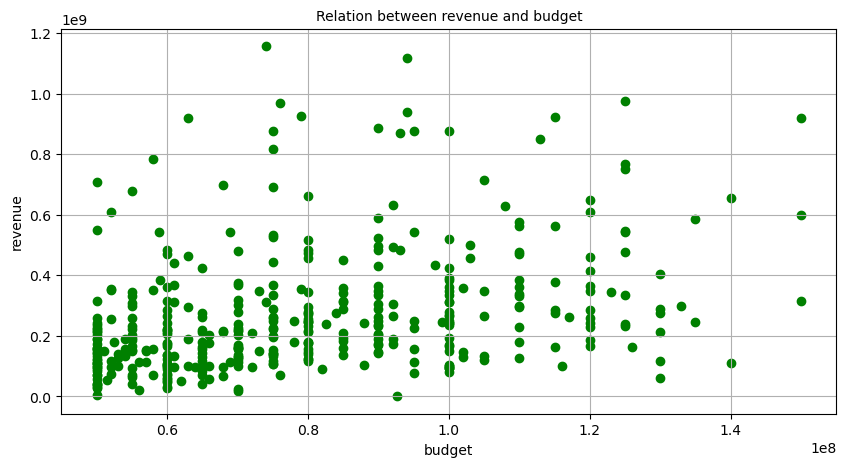

In [7]:
import matplotlib.pyplot as plt
## load data
x1 = np.array(data_movies["budget"])
y1 = np.array(data_movies["revenue"])

fig = plt.figure(1, figsize=(10, 5))

plt.scatter(x1, y1, c=['green'], marker='o')
plt.grid()
plt.xlabel("budget", fontsize=10)
plt.ylabel("revenue", fontsize=10)
plt.title("Relation between revenue and budget", fontsize=10)
plt.show()


###  Your task is to provide visual analysis of other attributes in relation to revenue to aid in feature selection for movie box office (revenue) prediction. 
- You can use other type of plots such as [scatter](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html), [bar](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html), [line](https://www.w3schools.com/python/matplotlib_line.asp), etc.

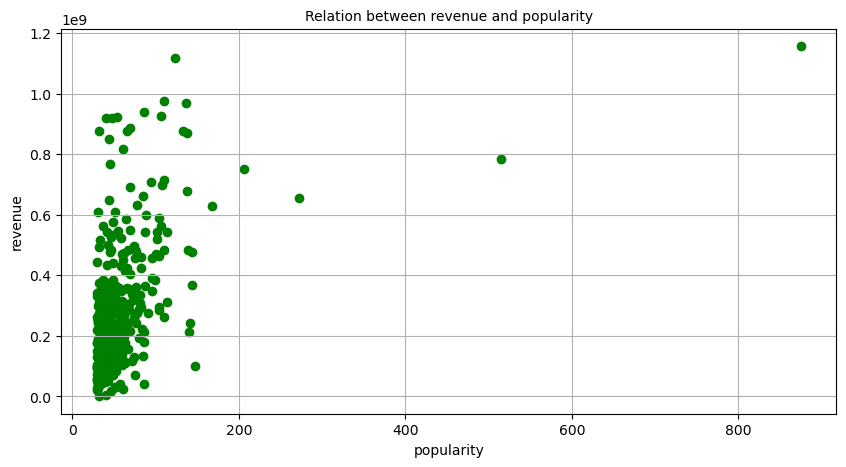

In [8]:
x1 = np.array(data_movies["popularity"])
y1 = np.array(data_movies["revenue"])

fig = plt.figure(1, figsize=(10,5))

plt.scatter(x1, y1, c=['green'], marker='o')
plt.grid()
plt.xlabel("popularity", fontsize=10)
plt.ylabel("revenue", fontsize=10)
plt.title("Relation between revenue and popularity", fontsize=10)
plt.show()

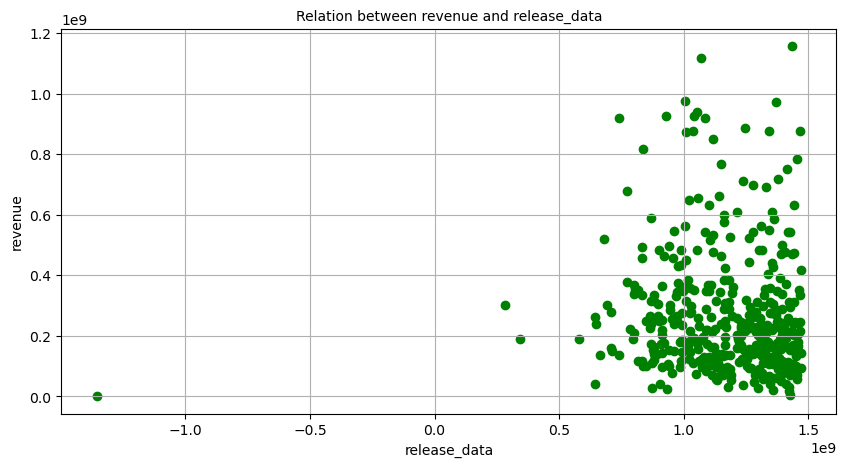

In [9]:
x1 = np.array(data_movies["release_data"])
y1 = np.array(data_movies["revenue"])

fig = plt.figure(1, figsize=(10,5))

plt.scatter(x1, y1, c=['green'], marker='o')
plt.grid()
plt.xlabel("release_data", fontsize=10)
plt.ylabel("revenue", fontsize=10)
plt.title("Relation between revenue and release_data", fontsize=10)
plt.show()

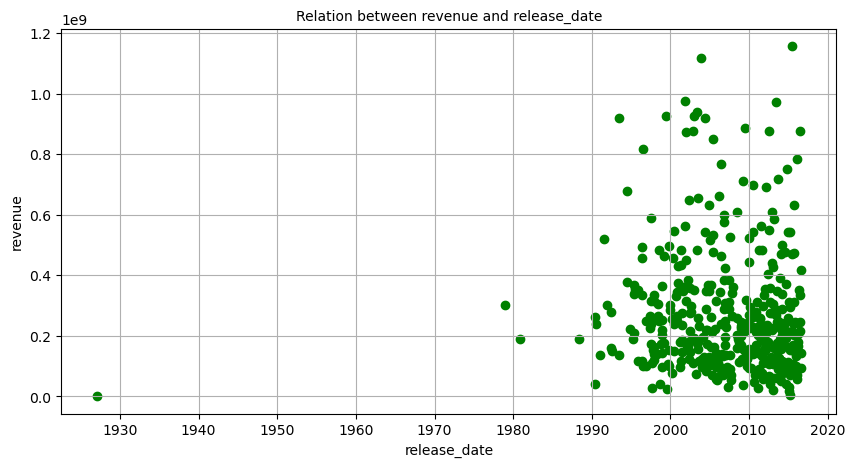

In [10]:
x1 = np.array(data_movies["release_date"])
y1 = np.array(data_movies["revenue"])

fig = plt.figure(1, figsize=(10,5))

plt.scatter(x1, y1, c=['green'], marker='o')
plt.grid()
plt.xlabel("release_date", fontsize=10)
plt.ylabel("revenue", fontsize=10)
plt.title("Relation between revenue and release_date", fontsize=10)
plt.show()

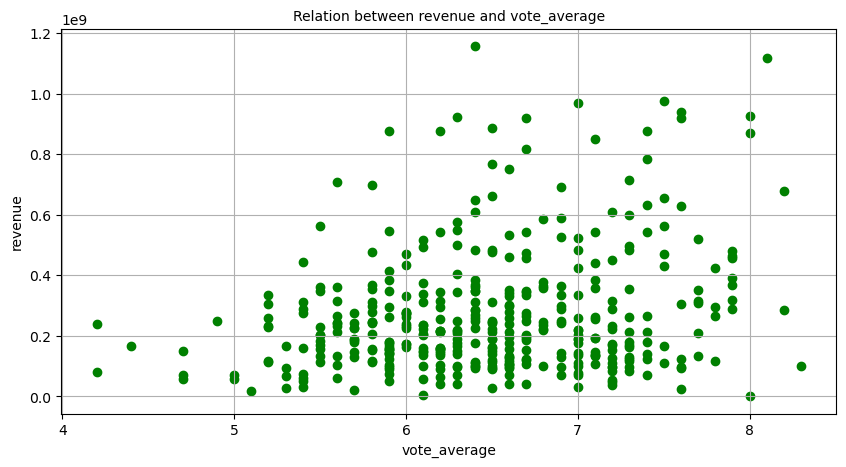

In [11]:
x1 = np.array(data_movies["vote_average"])
y1 = np.array(data_movies["revenue"])

fig = plt.figure(1, figsize=(10,5))

plt.scatter(x1, y1, c=['green'], marker='o')
plt.grid()
plt.xlabel("vote_average", fontsize=10)
plt.ylabel("revenue", fontsize=10)
plt.title("Relation between revenue and vote_average", fontsize=10)
plt.show()

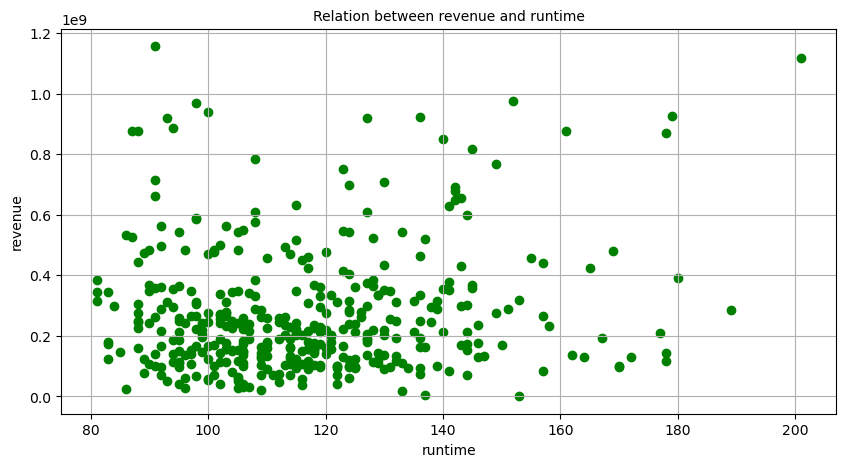

In [12]:
x1 = np.array(data_movies["runtime"])
y1 = np.array(data_movies["revenue"])

fig = plt.figure(1, figsize=(10,5))

plt.scatter(x1, y1, c=['green'], marker='o')
plt.grid()
plt.xlabel("runtime", fontsize=10)
plt.ylabel("revenue", fontsize=10)
plt.title("Relation between revenue and runtime", fontsize=10)
plt.show()

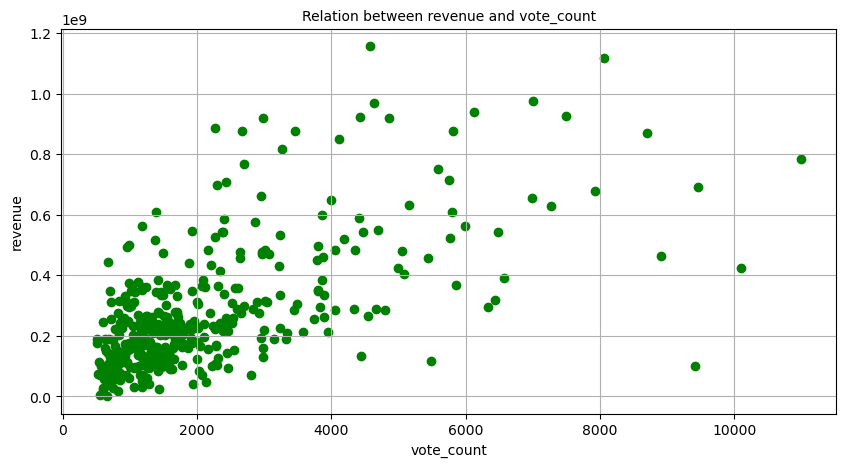

In [13]:
x1 = np.array(data_movies["vote_count"])
y1 = np.array(data_movies["revenue"])

fig = plt.figure(1, figsize=(10,5))

plt.scatter(x1, y1, c=['green'], marker='o')
plt.grid()
plt.xlabel("vote_count", fontsize=10)
plt.ylabel("revenue", fontsize=10)
plt.title("Relation between revenue and vote_count", fontsize=10)
plt.show()

# Task 2 Feature Engineering (45%)

## Task 2.1: Feature Conversion(15%)

- All features need to be converted into numerical format for computational analysis. Below is an example demonstrating how the genres column can be transformed using multi-hot encoding.

#### Why Multi One-Hot Encoding?
- Multi one-hot encoding is a method used to represent categorical features that can take on multiple values for each instance, such as genres and keywords. In our dataset, each movie can belong to multiple genres and have multiple keywords. By using multi one-hot encoding, we create binary columns representing each possible genre or keyword, with a value of 1 indicating its presence in a particular movie and 0 otherwise. This representation is crucial because it allows machine learning models to understand the presence or absence of specific genres or keywords without assuming any ordinal relationship between them. It also preserves the information about multiple categories being present at the same time, which can be vital for understanding complex relationships between features and the target variable (e.g., revenue). Using this encoding technique ensures that our models can effectively use these categorical features to make better predictions. You can refer to [How to Perform One-Hot Encoding For Multi Categorical Variables](https://www.analyticsvidhya.com/blog/2021/05/how-to-perform-one-hot-encoding-for-multi-categorical-variables/) for details.


- For the genres attribute, the data is initially in the form of a string representing a dictionary. Each dictionary contains an ID and the name of the genre. The same approach applies to the keywords column. See details below

- To achieve this, we will create a lookup table that maps each genre or keyword to a unique numerical value, which will then be used to encode the genres and keywords for each movie.
- Below is the example code of multi one-hot encoding for the genres attribute

In [14]:
import json
from sklearn.cluster import KMeans
import warnings

warnings.simplefilter(action='ignore')

# Extract all unique genres and keywords
all_genres = set()
all_keywords = set()

for i in range(data_movies.shape[0]):
    movie = data_movies.iloc[i]
    genres = eval(movie['genres'])
    for genre in genres:
        all_genres.add(genre['name'])

# Create a lookup table
genre_mapping = {genre: idx for idx, genre in enumerate(all_genres)}

# Encode each sample
def encode_movie(movie):
    genre_vector = np.zeros(len(genre_mapping))
    genres = eval(movie['genres'])
    for genre in genres:
        # One-hot encoding for genres
        genre_vector[genre_mapping[genre['name']]] = 1  
    
    return genre_vector

# Encode all movies
data_movies['genre_encoding'] = None

for i in range(data_movies.shape[0]):
    data_movies['genre_encoding'].iloc[i] = encode_movie(data_movies.iloc[i])
    

In [15]:
print(genre_mapping)

{'Action': 0, 'Crime': 1, 'Music': 2, 'Comedy': 3, 'Horror': 4, 'Adventure': 5, 'Fantasy': 6, 'Thriller': 7, 'Mystery': 8, 'Romance': 9, 'Animation': 10, 'War': 11, 'History': 12, 'Science Fiction': 13, 'Drama': 14, 'Family': 15, 'Western': 16}


- Show the genre encoding

In [16]:
data_movies['genre_encoding'] 

0      [0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0]
1      [1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
2      [1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
3      [0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0]
4      [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
                                               ...                                          
393    [0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0]
394    [0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
395    [0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0]
396    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0]
397    [0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.

### Your task is to do conversion on the feature of **keywords** referencing to the provided code above
> `movie['keywords']`

In [17]:
# Implemente keywords feature conversion, write your code here

for i in range(data_movies.shape[0]):
    movie = data_movies.iloc[i]
    keywords = eval(movie['keywords'])
    for keyword in keywords:
        all_keywords.add(keyword['name'])

# Create a lookup table
keyword_mapping = {keyword: idx for idx, keyword in enumerate(all_keywords)}

# Encode each sample
def encode_movie(movie):
    keyword_vector = np.zeros(len(keyword_mapping))
    keywords = eval(movie['keywords'])
    for keyword in keywords:
        # One-hot encoding for keywords
        keyword_vector[keyword_mapping[keyword['name']]] = 1  
    
    return keyword_vector

# Encode all movies
data_movies['keywords_encoding'] = None

for i in range(data_movies.shape[0]):
    data_movies['keywords_encoding'].iloc[i] = encode_movie(data_movies.iloc[i])

In [18]:
data_movies['keywords_encoding']

0      [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...]
1      [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,

In [19]:
print(len((data_movies.iloc[1]['keywords_encoding'])))

2474


## Task 2.2: Feature Alignment and Enhancement (15%)

### Feauture Alignment
After the feature conversion, the one-hot encoding of genres introduces an extra dimension in the DataFrame. To address this, we need to flatten the one-hot encoding.

- Your task is to flatten the `genre_encoding` column to ensure each genre feature is represented in a single dimension rather than in a nested array. The flattening makes it easier for machine learning models to process the data effectively in the bonus task

- Hints: you could refer to [np.flatten()](https://www.geeksforgeeks.org/numpy-ndarray-flatten-function-python/)

In [20]:
# Implement the lambda function to flatten the genre encoding
data_movies['genre_encoding_flattened'] = data_movies['genre_encoding'].apply(lambda x: x.flatten() )

data_movies_flattened = pd.DataFrame(data_movies['genre_encoding_flattened'].tolist(), index=data_movies.index)
data_movies = pd.concat([data_movies, data_movies_flattened], axis=1)
#data_movies.drop('genre_encoding', axis=1, inplace=True)

In [21]:
# Implement the lambda function to flatten the keyword encoding
data_movies['keywords_encoding_flattened'] = data_movies['keywords_encoding'].apply(lambda x: x.flatten() )

#data_movies_flattened = pd.DataFrame(data_movies['keywords_encoding_flattened'].tolist(), index=data_movies.index)
#data_movies = pd.concat([data_movies, data_movies_flattened], axis=1)
#data_movies.drop('keywords_encoding', axis=1, inplace=True)

### Feature Enhancement
- We can use existing features to generate new feature dimensions, such as budget and revenue: these two fields directly impact box office performance. We can try constructing ROI (Return on Investment), defined as ROI = revenue / budget, to measure investment effectiveness and thereby predict box office performance more accurately.

In [22]:
# Implement the lambda function to calculate the ROI
def ROI(data_movies):
    # Your code here
    data_movies['ROI'] = data_movies.apply(lambda x: x['revenue']/ x['budget'] if x['budget']!=0 else 0,axis=1 )
    data_movies['ROI'].replace([np.inf, -np.inf], np.nan, inplace=True) 
    data_movies['ROI'].fillna(data_movies['ROI'].mean(), inplace=True) 
    return data_movies

data_movies = ROI(data_movies)
data_movies["ROI"]

0      7.811804
1      0.474219
2      4.678652
3      6.016802
4      6.142564
         ...   
393    0.351807
394    2.211071
395    2.293118
396    0.007022
397    2.210698
Name: ROI, Length: 398, dtype: float64

## Task 2.3: Feature normalization (15%)

- Due to the varying scales of the features during computation, features with higher scales may dominate others. Therefore, normalization is necessary to ensure that all features are on the same scale for fair comparison and analysis.

- Normalization is to map the feature values scaled to range [0, 1]. so that the minimum value of each feature corresponds to 0, the maximum value corresponds to 1, and other values fall accordingly within this range.

- In this task you are requried to implement the [min-max](https://medium.com/@abhi1achiever/min-max-normalization-db1f515b08b4) normalization function.

In [23]:
# Implement the min-max normalize function
def normalize_features(features):
    min_vals = features.min(axis=0)
    max_vals = features.max(axis=0)
    # Write your code here
    numerical_features= (features-min_vals)/(max_vals-min_vals)
    return numerical_features

numerical_features = ['budget']
#print(data_movies['budget'].max(axis=0))
#print(data_movies['budget'].min(axis=0))

data_movies['budget_numerical_features'] = normalize_features(data_movies[numerical_features])
data_movies['budget_numerical_features'].head()



0    0.75
1    0.80
2    0.90
3    0.75
4    0.75
Name: budget_numerical_features, dtype: float64

- There are other normalization methods for your reference in the bonus task ([Z-score Normalization](https://www.statology.org/z-score-normalization/) and [Robust Scaling](https://scikit-learn.org/dev/modules/generated/sklearn.preprocessing.RobustScaler.html))

In [24]:
numerical_features = ['budget', 'popularity', 'vote_average', 'runtime','vote_count','release_data']

from sklearn.preprocessing import StandardScaler, RobustScaler
# Method 2: Standardization (Z-score Normalization)
scaler_standard = StandardScaler()
data_standard_normalized = data_movies.copy()
data_standard_normalized[numerical_features] = scaler_standard.fit_transform(data_movies[numerical_features])

# Method 3: Robust Scaling (less sensitive to outliers)
scaler_robust = RobustScaler()
data_robust_normalized = data_movies.copy()
data_robust_normalized[numerical_features] = scaler_robust.fit_transform(data_movies[numerical_features])

In [25]:
print(data_standard_normalized[numerical_features])

       budget  popularity  vote_average   runtime  vote_count  release_data
0    1.905642    0.961581      1.376651  1.677971    2.828928     -0.619019
1    2.115994   -0.327932     -1.467158 -0.975919   -0.508660      0.849300
2    2.536698    3.922983      1.376651  1.251453    2.816730     -0.412311
3    1.905642    2.721049      0.157876  0.303635    2.002953      1.017423
4    1.905642   -0.220708      0.022456  1.535798    0.330093     -0.052982
..        ...         ...           ...       ...         ...           ...
393 -0.997220   -0.509980     -1.060899 -0.359837   -0.896090      0.786943
394  0.012471   -0.511348     -0.112963 -0.644183   -0.948367     -0.959054
395 -0.828938   -0.306030      0.699554 -0.975919   -0.594046      0.041759
396  0.543400   -0.457668      2.053748  1.725362   -0.858916    -10.037688
397 -0.618586   -0.464563     -0.383802 -0.691574   -0.846137      1.234811

[398 rows x 6 columns]


In [26]:
print(data_robust_normalized[numerical_features])

       budget  popularity  vote_average   runtime  vote_count  release_data
0    1.342282    2.688911      0.930233  1.407407    3.647431     -0.520020
1    1.476510   -0.257056     -1.023256 -0.666667   -0.174954      0.543221
2    1.744966    9.454407      0.930233  1.074074    3.633461     -0.370338
3    1.342282    6.708518      0.093023  0.333333    2.701480      0.664962
4    1.342282   -0.012097      0.000000  1.296296    0.785631     -0.110141
..        ...         ...           ...       ...         ...           ...
393 -0.510067   -0.672954     -0.744186 -0.185185   -0.618660      0.498067
394  0.134228   -0.676080     -0.093023 -0.407407   -0.678530     -0.766247
395 -0.402685   -0.207019      0.465116 -0.666667   -0.272742     -0.041537
396  0.473020   -0.553444      1.395349  1.444444   -0.576085     -7.340277
397 -0.268456   -0.569197     -0.279070 -0.444444   -0.561450      0.822377

[398 rows x 6 columns]


# Bonus Task: Movie Box Office Prediction (20%)

In this task, we will implement a movie box office prediction system for movie revenue prediction. 
You are free to choose different  numerical features like popularity, vote_average, and vote_count, as well as genre and keyword encodings as the input feature matrix. We will provide the basic prediction model as follows:



#### Basic Model: XGBoost Custom Model Explanation
The `XGBoostCustom` class is an implementation of the gradient boosting algorithm that focuses on building decision trees sequentially, where each tree attempts to correct the errors of the previous one. Let's break down the key components of this class:

##### Key Components:
1. **Initialization (`__init__` method)**:
   - The model has several hyperparameters like `n_estimators` (number of boosting rounds), `learning_rate` (contribution of each tree), `max_depth` (depth of each tree), and `lambda_` (regularization term).
   - A list `trees` is used to store the individual decision trees built during the boosting process.

2. **Training (`fit` method)**:
   - The initial prediction is set to the mean of the target variable, which is used to make a starting guess for each sample.
   - For each boosting round, the model computes gradients (first derivative) and Hessians (second derivative) to determine the direction and magnitude for error correction.
   - A decision tree is built based on these gradients and Hessians, and the resulting tree is appended to the list of trees.
   - The predictions are updated after each tree is added.

3. **Prediction (`predict` method)**:
   - The final prediction starts with the base prediction (mean of the target variable).
   - Predictions from each tree are added sequentially, scaled by the `learning_rate`.

4. **Gradient and Hessian Calculations (`_gradient` and `_hessian` methods)**:
   - The gradient represents the direction of the error and is computed as the difference between the predicted value and the actual target (`y_pred - y`).
   - The Hessian represents the rate of change of the gradient and is constant in this case (`1`) for mean squared error.

5. **Building Decision Trees (`_build_tree` method)**:
   - Trees are built recursively. The method stops if the maximum depth is reached or there are too few samples to split.
   - It calculates the optimal split based on feature thresholds, maximizing the information gain.
   - If no good split is found, the node becomes a leaf, and its value is determined by the gradient and Hessian.

6. **Gain Calculation (`_gain` method)**:
   - The gain calculation helps to determine the best split by maximizing the reduction in error.
   - It uses the sum of gradients and Hessians for the left and right splits to compute the gain.

7. **Tree Prediction (`_predict_tree` method)**:
   - This method is used to recursively traverse a decision tree and make predictions.
   - If a node is a leaf, the prediction is simply the value of that leaf.
   - If it's not a leaf, the method checks the feature value against the threshold and continues to either the left or right child node.

### Insights for Students:
- **Gradient Boosting Principle**: The goal of gradient boosting is to sequentially build trees where each tree corrects the residual errors of the previous trees. This enables the model to learn complex functions and reduce error iteratively.
- **Regularization**: The `lambda_` parameter helps in controlling the complexity of the model to prevent overfitting, especially when the dataset has high variance.
- **Learning Rate**: It controls the contribution of each tree to the overall model, which is useful for stabilizing training and avoiding overfitting.
- **Gradient and Hessian**: These derivatives guide the model in the direction of reducing the loss function, enabling it to effectively improve prediction accuracy.

This custom implementation simplifies the core concepts behind XGBoost, making it easier to understand how boosting works step by step. By building trees based on gradients and adjusting predictions iteratively, this model mimics the core behavior of more advanced boosting frameworks.

For details, you can refer to: https://xgboost.readthedocs.io/en/latest/tutorials/index.html

In [27]:
class XGBoostCustom:
    def __init__(self, n_estimators=100, learning_rate=0.1, max_depth=3, lambda_=1):
        # Initialize model parameters
        self.n_estimators = n_estimators
        self.learning_rate = learning_rate
        self.max_depth = max_depth
        self.lambda_ = lambda_
        # List to store trees for boosting
        self.trees = []  

    def fit(self, X, y):
        # Initialize predictions with the mean value of the target
        self.base_prediction = np.mean(y)
        y_pred = np.full(y.shape, self.base_prediction)

        # Train multiple trees as specified by n_estimators
        for _ in range(self.n_estimators):
            # Calculate gradients and Hessians
            gradient = self._gradient(y, y_pred)
            hessian = self._hessian(y, y_pred)

            # Build a new decision tree based on gradient and Hessian
            tree = self._build_tree(X, gradient, hessian, depth=0)
            self.trees.append(tree)

            # Update predictions with the newly trained tree
            y_pred += self.learning_rate * self._predict_tree(tree, X)

    def predict(self, X):
        # Start predictions with the base prediction
        y_pred = np.full((X.shape[0],), self.base_prediction)
        # Add predictions from each tree
        for tree in self.trees:
            y_pred += self.learning_rate * self._predict_tree(tree, X)
        return y_pred

    def _gradient(self, y, y_pred):
        # Calculate the first derivative (gradient) of the mean squared error
        return y_pred - y

    def _hessian(self, y, y_pred):
        # The second derivative (Hessian) for mean squared error is constant (1)
        return np.ones_like(y)

    def _build_tree(self, X, gradient, hessian, depth):
        # Stop recursion if max depth is reached or if there's no data to split
        if depth == self.max_depth or len(gradient) < 2:
            # Leaf node value calculated as sum of gradients divided by sum of Hessians + lambda
            leaf_value = -np.sum(gradient) / (np.sum(hessian) + self.lambda_)
            return {"leaf_value": leaf_value}

        # Initialize best split parameters
        best_split = None
        best_gain = -float("inf")
        m, n = X.shape

        # Try each feature and threshold to find the best split
        for feature in range(n):
            thresholds = np.unique(X[:, feature])
            for threshold in thresholds:
                # Split data into left and right nodes
                left_mask = X[:, feature] <= threshold
                right_mask = X[:, feature] > threshold

                # Skip if one of the nodes is empty
                if np.sum(left_mask) == 0 or np.sum(right_mask) == 0:
                    continue

                # Calculate gain for this split
                gain = self._gain(gradient, hessian, left_mask, right_mask)
                if gain > best_gain:
                    best_gain = gain
                    best_split = {"feature": feature, "threshold": threshold, "left": left_mask, "right": right_mask}

        # If no good split was found, make this node a leaf
        if best_split is None:
            leaf_value = -np.sum(gradient) / (np.sum(hessian) + self.lambda_)
            return {"leaf_value": leaf_value}

        # Recursively build the left and right branches of the tree
        left_tree = self._build_tree(X[best_split["left"]], gradient[best_split["left"]], hessian[best_split["left"]], depth + 1)
        right_tree = self._build_tree(X[best_split["right"]], gradient[best_split["right"]], hessian[best_split["right"]], depth + 1)
        return {"feature": best_split["feature"], "threshold": best_split["threshold"], "left": left_tree, "right": right_tree}

    def _gain(self, gradient, hessian, left_mask, right_mask):
        ###Your code here
        # Calculate the gain from splitting the node
        G_L, G_R = np.sum(gradient[left_mask]), np.sum(gradient[right_mask])
        H_L, H_R = np.sum(hessian[left_mask]), np.sum(hessian[right_mask])
        
        # Gain = 0.5 * [(G_L^2 / (H_L + lambda)) + (G_R^2 / (H_R + lambda)) - ((G_L + G_R)^2 / (H_L + H_R + lambda))]
        gain = 0.5 * ((G_L ** 2) / (H_L + self.lambda_) + (G_R ** 2) / (H_R + self.lambda_) -
                      (G_L + G_R) ** 2 / (H_L + H_R + self.lambda_))
        return gain

    def _predict_tree(self, tree, X):
        # Recursive prediction for a single tree
        if "leaf_value" in tree:
            return np.full(X.shape[0], tree["leaf_value"])
                           
        # Identify the left and right nodes based on feature threshold
        feature, threshold = tree["feature"], tree["threshold"]
        left_mask = X[:, feature] <= threshold
        right_mask = X[:, feature] > threshold

        # Predict for left and right branches
        y_pred = np.zeros(X.shape[0])
        y_pred[left_mask] = self._predict_tree(tree["left"], X[left_mask])
        y_pred[right_mask] = self._predict_tree(tree["right"], X[right_mask])
        return y_pred

### Your task is to enhance the accuracy of your prediction model using the following methods:
- You could include different features by exploring the dataset in Task 1
    > `selected_feature =  ['budget', 'genre_encoding', ...]`
    - Note that the feature of `genre_encoding` is already encoded by Task 2.1

- You could perform feature engineering/enhancement in Task 2.2
    > e.g. `def One-hot encoding(), def ROI() ...`

- You could choose different normalization methods in Task 2.3
    > `X_train = normalize_features(X_train)`



In [28]:
data_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 45 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   index                        398 non-null    int64         
 1   budget                       398 non-null    int64         
 2   genres                       398 non-null    object        
 3   homepage                     241 non-null    object        
 4   id                           398 non-null    int64         
 5   keywords                     398 non-null    object        
 6   original_language            398 non-null    object        
 7   original_title               398 non-null    object        
 8   overview                     398 non-null    object        
 9   popularity                   398 non-null    float64       
 10  production_companies         398 non-null    object        
 11  production_countries         398 non-null    

In [29]:
# Data process and training 
data_test=pd.read_csv('data/tmdb_5000_movies_test.csv')
process_release_date(data_test)

# You can select different features depending on related attribute (Task 1) 
# and use different feature engineering methods to train the model (Task 2.2， e.g. 'release_data'  is enhanced features)
# You can switch between different normalization methods (Task 2.3)

selected_feature= ['budget', 'popularity', 'vote_average', 'runtime','vote_count','release_data']
selected_feature_to_norm =  ['budget', 'popularity', 'vote_average', 'runtime','vote_count','release_data']
target_feature = 'revenue'
data_train_normalized = data_movies.copy()
Y_train = data_movies[target_feature].values
#X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


def encode_movie(movie):
    genre_vector = np.zeros(len(genre_mapping))
    genres = eval(movie['genres'])
    for genre in genres:
        # One-hot encoding for genres
        genre_vector[genre_mapping[genre['name']]] = 1  
    
    return genre_vector

all_genres = set()

for i in range(data_movies.shape[0]):
    movie = data_movies.iloc[i]
    genres = eval(movie['genres'])
    for genre in genres:
        all_genres.add(genre['name'])

test_genre_mapping = {genre: idx for idx, genre in enumerate(all_genres)}
data_test['genre_encoding'] = None
for i in range(data_test.shape[0]):
    data_test['genre_encoding'].iloc[i] = encode_movie(data_test.iloc[i])
data_test['genre_encoding_flattened'] = data_test['genre_encoding'].apply(lambda x: x.flatten() )
data_test_flattened = pd.DataFrame(data_test['genre_encoding_flattened'].tolist(), index=data_test.index)
data_test = pd.concat([data_test, data_test_flattened], axis=1)

data_test_normalized = data_test.copy()




In [30]:
print(data_test['budget'].mean())
print(data_test['popularity'].mean())
print(data_test['vote_count'].mean())
print(data_test['vote_average'].mean())
print(data_test['runtime'].mean())

167406565.65656567
78.94492943434344
3503.540404040404
6.462121212121212
122.77777777777777


In [31]:
print(data_test['budget'].median())
print(data_test['popularity'].median())
print(data_test['vote_count'].median())
print(data_test['vote_average'].median())
print(data_test['runtime'].median())

155000000.0
62.6197045
2843.5
6.45
120.5


In [32]:
# Why normalized data performs even worse?

# Mabybe it is because the range of two dataset are different. Norm them together in one dataframe.


all_normalized=pd.concat([data_train_normalized,data_test_normalized])
#all_normalized[selected_feature_to_norm]=scaler_robust.fit_transform(all_normalized[selected_feature_to_norm])
#all_normalized[selected_feature_to_norm]=scaler_standard.fit_transform(all_normalized[selected_feature_to_norm])

#However, it is still worse than not normalized data.

data_train_normalized[selected_feature_to_norm]=all_normalized[selected_feature_to_norm][:len(data_train_normalized)]
data_test_normalized[selected_feature_to_norm]=all_normalized[selected_feature_to_norm][len(data_train_normalized):]

In [33]:
data_train_normalized[selected_feature].tail()

,budget,popularity,vote_average,runtime,vote_count,release_data
393,56000000,29.490057,5.7,109.0,593,1358467200
394,80000000,29.415229,6.4,103.0,503,920592000
395,60000000,40.646102,7.0,96.0,1113,1171584000
396,92620000,32.351527,8.0,153.0,657,-1356220800
397,65000000,31.974359,6.2,102.0,679,1470787200


In [34]:
data_test_normalized[selected_feature].head()

,budget,popularity,vote_average,runtime,vote_count,release_data
0,237000000,150.437577,7.2,162.0,11800,1260403200
1,300000000,139.082615,6.9,169.0,4500,1179532800
2,245000000,107.376788,6.3,148.0,4466,1445817600
3,250000000,112.312950,7.6,165.0,9106,1342396800
4,260000000,43.926995,6.1,132.0,2124,1331078400


In [35]:
data_test_normalized[selected_feature].tail()

,budget,popularity,vote_average,runtime,vote_count,release_data
193,127500000,26.548594,6.2,82.0,542,958694400
194,127000000,115.597753,6.1,97.0,1851,1418774400
195,130000000,68.757242,6.7,95.0,1918,1288224000
196,125000000,109.984351,7.5,152.0,7006,1005868800
197,130000000,39.448066,5.4,96.0,1260,1374105600


In [36]:
print(genre_mapping)
print(test_genre_mapping)

{'Action': 0, 'Crime': 1, 'Music': 2, 'Comedy': 3, 'Horror': 4, 'Adventure': 5, 'Fantasy': 6, 'Thriller': 7, 'Mystery': 8, 'Romance': 9, 'Animation': 10, 'War': 11, 'History': 12, 'Science Fiction': 13, 'Drama': 14, 'Family': 15, 'Western': 16}
{'Action': 0, 'Crime': 1, 'Music': 2, 'Comedy': 3, 'Horror': 4, 'Adventure': 5, 'Fantasy': 6, 'Thriller': 7, 'Mystery': 8, 'Romance': 9, 'Animation': 10, 'War': 11, 'History': 12, 'Science Fiction': 13, 'Drama': 14, 'Family': 15, 'Western': 16}


In [37]:
selected_feature =  ['budget','popularity', 'vote_average', 'runtime','vote_count','release_data']
selected_feature=selected_feature+[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16]
print(selected_feature)

X_train=data_train_normalized[selected_feature].values
X_test=data_test_normalized[selected_feature].values

['budget', 'popularity', 'vote_average', 'runtime', 'vote_count', 'release_data', 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]


In [38]:
print(X_train)

[[ 1.25000000e+08  1.09984351e+02  7.50000000e+00  1.52000000e+02
   7.00600000e+03  1.00586880e+09  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00
   1.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  1.00000000e+00  0.00000000e+00]
 [ 1.30000000e+08  3.94480660e+01  5.40000000e+00  9.60000000e+01
   1.26000000e+03  1.37410560e+09  1.00000000e+00  1.00000000e+00
   0.00000000e+00  1.00000000e+00  0.00000000e+00  0.00000000e+00
   1.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 1.40000000e+08  2.71972889e+02  7.50000000e+00  1.43000000e+02
   6.98500000e+03  1.05770880e+09  1.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00
   1.00000000e+00  0.00000000e+00  0.000

In [39]:
print(X_test)

[[2.37000000e+08 1.50437577e+02 7.20000000e+00 1.62000000e+02
  1.18000000e+04 1.26040320e+09 1.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 1.00000000e+00
  1.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 1.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [3.00000000e+08 1.39082615e+02 6.90000000e+00 1.69000000e+02
  4.50000000e+03 1.17953280e+09 1.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 1.00000000e+00
  1.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [2.45000000e+08 1.07376788e+02 6.30000000e+00 1.48000000e+02
  4.46600000e+03 1.44581760e+09 1.00000000e+00 1.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 1.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00

In [40]:
#print(Y_train)

In [41]:
# Initialize and train the model
model = XGBoostCustom(n_estimators=100, learning_rate=0.1, max_depth=3)
model.fit(X_train, Y_train)

In [42]:
# Predict and evaluate
y_pred = model.predict(X_test)
print(y_pred)
data_test['revenue'] =y_pred
data_test['revenue']= data_test['revenue'].astype(int)
selected_columns = data_test[['id', 'revenue']]
selected_columns.to_csv('answer.csv', index=False)

[9.60129205e+08 8.55569308e+08 8.57791511e+08 6.90878938e+08
 3.00483338e+08 6.03490242e+08 6.96543555e+08 8.22358619e+08
 8.35595398e+08 8.89781079e+08 3.45081301e+08 5.06728560e+08
 8.37157534e+08 4.83943373e+08 7.10143304e+08 4.29600615e+08
 9.03032705e+08 8.47925688e+08 4.94153101e+08 8.57957080e+08
 7.08430992e+08 3.48760751e+08 7.38447500e+08 2.84026304e+08
 4.41769027e+08 6.61982518e+08 8.36373193e+08 2.48545624e+08
 8.63033243e+08 7.83048904e+08 7.73205951e+08 5.87571903e+08
 7.39793229e+08 4.98292252e+08 6.86218820e+08 6.30467747e+08
 5.63143613e+08 6.72598710e+08 6.89224550e+08 4.42935834e+08
 5.10898946e+08 3.26862473e+08 6.75281498e+08 3.79503925e+08
 4.92344331e+08 4.20008103e+08 8.11266267e+08 5.52596043e+08
 6.00730704e+08 3.20647897e+08 3.80763463e+08 5.52596043e+08
 5.79964516e+08 4.34438028e+08 4.56368371e+08 9.34261888e+08
 3.55611070e+08 7.28192000e+08 1.78153166e+08 7.42984292e+08
 3.86704941e+08 3.55158021e+08 7.36513635e+08 7.05242332e+08
 6.52485708e+08 7.895543

### Submit the prediction results 'answer.csv' to https://www.kaggle.com/t/8c4b735a6169400eabb25d7b07bd01ab

- We will mark the results according to your prediction results.
- Please use your school email to register and log in, we can obtain the student ID from the email.
- Please keep this part of your code in this notebook, we will use it to validate your prediction results.